# Aula 5 - Exercícios - Gráficos
### Consulta a internet (Google, Stackoverflow e etc) liberada!!

In [2]:
# Importe a biblioteca pandas
import pandas as pd
import seaborn as sns
sns.set(style="white")  # Ajusta valor padrão de tema, escala e paleta de cor


### 5.1 Plote um boxplot do índice de gini dos municípios brasileiros.
#### Veja o resultado esperado a seguir.


#### Dica: é necessário alguma manipulação dos dados antes de plotar o gráfico.
#### path_gini='../../curso_ciencia_dados2020/data/originais/gini/ginibr.csv'

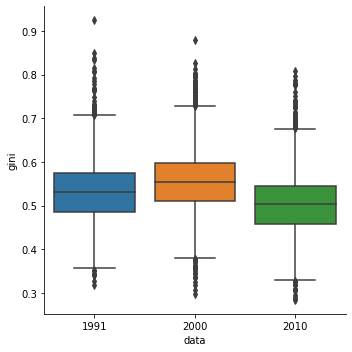

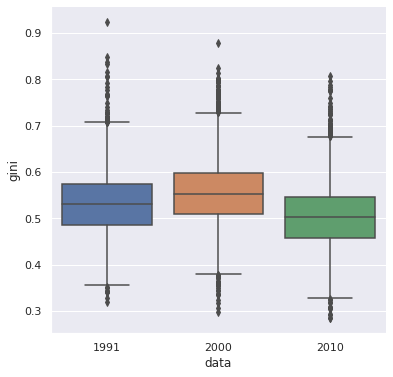

In [10]:
# YOUR CODE HERE
path_gini = '../../curso_ciencia_dados2020/data/originais/gini/ginibr.csv'
df_gini = pd.read_csv(path_gini, sep=';', na_values='...', skiprows=2, skipfooter=1, \
                          decimal = ',', \
                          dtype={'1991': float, '2000': float, '2010': float}, engine='python')

df_gini_melt = df_gini.melt(value_vars=['1991', '2000', '2010'], \
                                    var_name='data', value_name='gini', ignore_index=False )

sns.set(rc={'figure.figsize':(6,6)})
sns.boxplot(x="data", y="gini", data=df_gini_melt)
sns.despine()

### 5.2 Plote um gráfico que mostre a evolução ao longo do tempo dos dados de curetagem do Estado de São Paulo.


#### Dica: Inspire-se no exercício quase igual a esse resolvido durante a aula 5. O que você precisa fazer a mais é filtrar os dados do Estado de São Paulo.
#### path_curetagem='../../curso_ciencia_dados2020/data/originais/curetagem/consolidado/curetagem2018.xlsx'


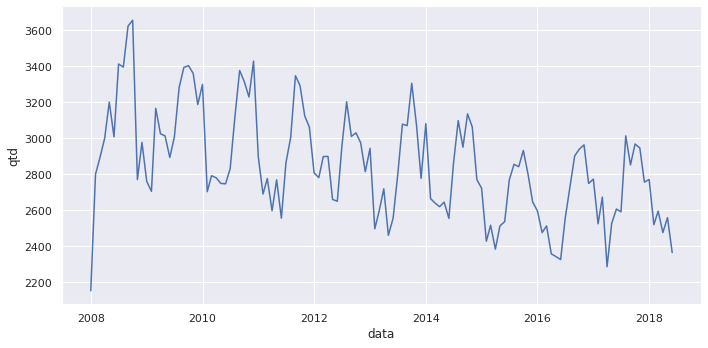

In [22]:
# YOUR CODE HERE
from datetime import datetime
import locale

locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')

path_curetagem = '../../curso_ciencia_dados2020/data/originais/curetagem/consolidado/curetagem2018.xlsx'
df_curetagem = pd.read_excel(path_curetagem, na_values='-')
df_curetagem.rename(columns={'Unidade da Federação': 'uf'}, inplace=True)
del df_curetagem['Total']

df_cur_melt = df_curetagem.melt(id_vars=['uf'], var_name = 'data', value_name='qtd')
df_cur_melt['data'] = df_cur_melt['data'].apply(lambda x: datetime.strptime(x, '%Y/%b'))
df_sp = df_cur_melt[df_cur_melt['uf'] == '35 São Paulo']

# sns.set(rc={'figure.figsize':(15.7,9.27)})
sns.relplot(kind='line', x='data', y='qtd', aspect=2, data=df_sp)

### 5.3 Plote um gráfico boxplot do dataset tips como o da figura a seguir.


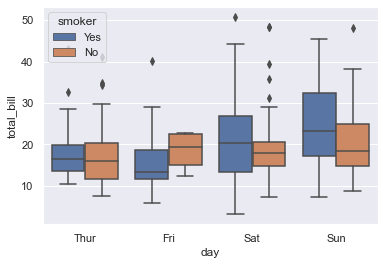

#### Sem dicas.

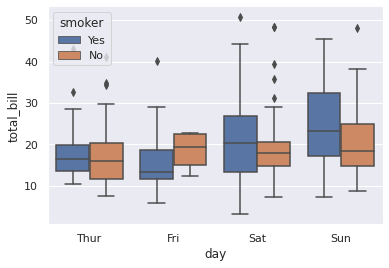

In [14]:
# YOUR CODE HERE
sns.set(style="ticks")
tips = sns.load_dataset("tips")

sns.set(rc={'figure.figsize':(6,4)})
sns.boxplot(x="day", y="total_bill", hue='smoker', data=tips)
sns.despine()

### 5.4 Plote um gráfico boxplot da coluna Valor_total de 5 municípios do dataset de Morbidade do Datasus. Os municípios a serem plotados são aqueles que obtiveram o maior custo médio diário de internação em todo o brasil. 
#### Esta métrica de custo médio diário de internação foi calculada no exercício 4.5 e 4.6. Use um argumento aspect=2 para o gráfico não sobrepor os nomes das cidades.


#### Dica: Antes de tentar plotar o gráfico, escreva algumas sentenças de código usando operações do pandas para encontrar quais são esses 5 municípios.
#### path_morbidade = '../../curso_ciencia_dados2020/data/originais/morbidade/consolidado/morbidade.csv'


/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (11,13,15) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


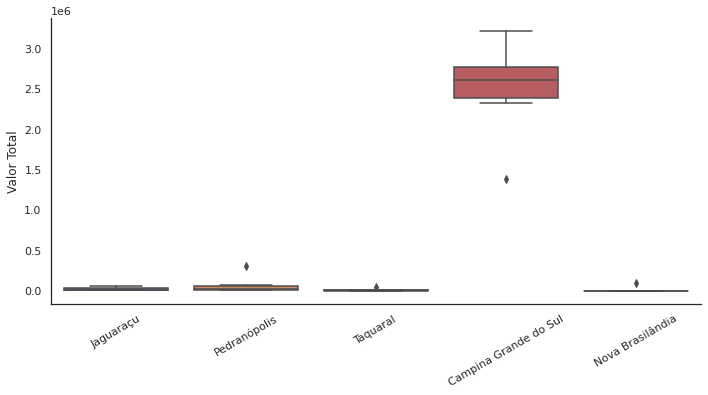

In [14]:
import matplotlib.pyplot as plt # Biblioteca para plotar gráficos

# ------------------------------------------------------------------------
# Função para fazer o merge dos datasets de morbidade e população
# ------------------------------------------------------------------------
def merge_morbidade_pop(path_pop, path_morbidade):
    """retorne o merge dos datasets de população e morbidade.
    """
    # YOUR CODE HERE
    try:
        df_pop = pd.read_excel(path_pop, index_col=0, dtype={'cod_uf': str, 'cod_munic': str})
        df_pop['cod_ibge6'] = df_pop['cod_uf'] + df_pop['cod_munic'].apply(lambda row: row[:-1])

        
        df_morbidade = pd.read_csv(path_morbidade, sep=';', decimal=',', na_values='-', \
                                   dtype={'cod_ibge6': str})

        return pd.merge(df_pop, df_morbidade, on='cod_ibge6')
        
    except ValueError as e:
        
        raise NotImplementedError(e)
        
# ------------------------------------------------------------------------
# Função para calcular o custo médio de internação
# ------------------------------------------------------------------------
def custo_medio_internacao_agregado(df_morbidade_pop):
    """retorne o merge dos datasets de população e morbidade.
    """
    # YOUR CODE HERE
    try:
        df_agg = df_morbidade_pop.groupby(['uf', 'cod_ibge6', 'municipio']).agg({'Valor_total': 'sum', \
                                                           'Internações': 'sum', \
                                                          'Dias_permanência': 'sum'})
        df_agg['custo_medio_diario_intern'] = df_agg['Valor_total'] / df_agg['Dias_permanência']
        return df_agg
    except ValueError as e:
        
        raise NotImplementedError(e)
        
        
# ------------------------------------------------------------------------
# Codigo de resolução do exercício com o uso das funções acima
# ------------------------------------------------------------------------
path_morbidade = '../../curso_ciencia_dados2020/data/originais/morbidade/consolidado/morbidade.csv'
path_pop = '../../curso_ciencia_dados2020/data/originais/populacao/estimativa_dou_2017.xlsx'

df_morbidade_pop = merge_morbidade_pop(path_pop, path_morbidade)
top5 = custo_medio_internacao_agregado(df_morbidade_pop).sort_values(by='custo_medio_diario_intern', ascending=False).head()
top5 = df_plot.reset_index()

top5_custos = df_morbidade_pop[df_morbidade_pop['cod_ibge6'].isin(top5['cod_ibge6'])]
top5_custos 
# df_plot['Valor_total'] = df_plot['Valor_total']/1000


g = sns.catplot(x="municipio", y="Valor_total", \
                data=top5_custos, kind="box", aspect=2)
g.set_axis_labels("", "Valor Total")
plt.setp(g.ax.get_xticklabels(), rotation=30);

# sns.catplot(x="Município", y="Valor_total", kind="box", data=top5_custos, aspect=2);


### 5.5 Faça o merge do dataset de morbidade com o dataset do índice de gini e plote um gráfico do tipo pairplot das seguintes variáveis (colunas): 'Internações',  'Óbitos', '2010' 



#### Dica: não tente plotar um pairplot de todas as variáveis, pois pode demorar bastante.
#### path_morbidade = '../../curso_ciencia_dados2020/data/originais/morbidade/consolidado/morbidade.csv'
#### path_gini = '../../curso_ciencia_dados2020/data/originais/gini/ginibr.csv'

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (11,13,15) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


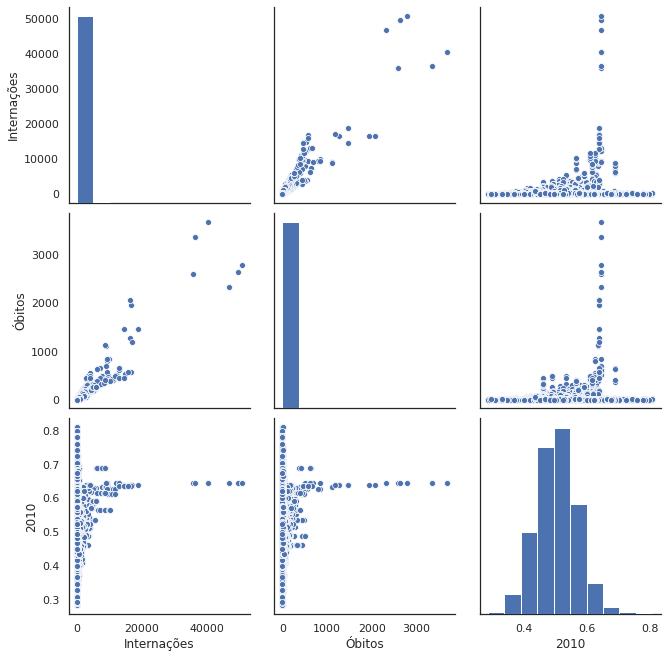

In [28]:
# YOUR CODE HERE
def merge_morbidade_gini(path_gini, path_morbidade):
    """retorne o merge dos datasets de população e morbidade.
    """
    # YOUR CODE HERE
    try:
        df_gini = pd.read_csv(path_gini, sep=';', na_values='...', skiprows=2, skipfooter=1, \
                              decimal = ',', \
                              dtype={'1991': float, '2000': float, '2010': float}, engine='python')

        df_gini['cod_ibge6'] = df_gini['Município'].apply( lambda x: str(x.split(' ')[0]) )

        
        df_morbidade = pd.read_csv(path_morbidade, sep=';', decimal=',', na_values='-', \
                                   dtype={'cod_ibge6': str})

        return pd.merge(df_gini, df_morbidade, on='cod_ibge6')
        
    except ValueError as e:
        
        raise NotImplementedError(e)
        
path_morbidade = '../../curso_ciencia_dados2020/data/originais/morbidade/consolidado/morbidade.csv'
path_gini = '../../curso_ciencia_dados2020/data/originais/gini/ginibr.csv'
df_plot = merge_morbidade_gini(path_gini, path_morbidade)

df_plot
g = sns.pairplot(df_plot, height=3, vars=["Internações", "Óbitos", "2010"], palette="Set2")
